In [1]:
import sys
import os
import re
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.stats import sem
from scipy.signal import butter, filtfilt, savgol_filter
from scipy.optimize import curve_fit, differential_evolution
import matplotlib
from dataclasses import dataclass
import AnalysisFunctions
from FileInfoClass import FileInfo
import Constants
import Colors
# plt.rcParams.keys()
plt.rcParams.update({
    'font.family': 'times new roman',
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'axes.labelsize': 12,
    'axes.titlesize': 12,
    'axes.spines.right': False,
    'axes.spines.top': False,
    'figure.dpi': 300,
    'legend.edgecolor': 'white'
    })

In [2]:
class Analysis:
    def __init__(self) -> None:
        super().__init__()

    def Run(Directory: str = None, AnalyzeTimepoint: str = None, Model: str = None, Test: str = None, Graph: bool = False) -> tuple[list[FileInfo], pd.DataFrame]:
        All_Files = []
        AnalyzedFiles = []
        
        EmptyDataframe = AnalysisFunctions.CreateDataFrame(Model = Model, Test = Test)
       
        for root, subdirs, files in os.walk(Directory):
            for file in files:
                if AnalyzeTimepoint is not None:
                    if AnalyzeTimepoint in file:
                        All_Files.append(os.path.join(root, file))
                else:
                    All_Files.append(os.path.join(root, file))
        
        All_Files = sorted(All_Files)
        
        if Model == 'Single Fibre':
            if Test == 'pCa':
            # Single fibre pCa
                for File in All_Files:
                    if File.lower().__contains__('pca'):
                        # Read text file, grab information from filename, and returns dataframe with necessary raw data for further analyses
                        Data, Subject, Muscle, Fibre, pCa, FibreLength, SarcomereLength, CSA = AnalysisFunctions.ReadFile(File = File, Test = Test)

                        # pCa analysis
                        Data, PeakForce, SpecificForce = AnalysisFunctions.pCaAnalysis(Data = Data, CSA = CSA, Graph = Graph)

                        OrganizedData = {
                                'Subject': Subject,
                                'Muscle': Muscle,
                                'Timepoint': Timepoint,
                                'Fibre Length': FibreLength,
                                'Fibre': Fibre,
                                'Sarcomere Length': SarcomereLength,
                                'CSA': CSA,
                                f'Active Force (pCa {pCa})': PeakForce,
                                f'Specific Force (pCa {pCa})': SpecificForce
                        }

                        # Put information/data into class object
                        EachFileInfo = FileInfo(
                            Subject = Subject,
                            Muscle = Muscle,
                            Fibre = Fibre,
                            pCa = pCa,
                            Test = 'pCa',
                            Filename = os.path.basename(File),
                            OrganizedData = OrganizedData
                        )
                    
                        # Put all FileInfo class objects into list
                        # Lets us call individual files and all related information for said file
                        AnalyzedFiles.append(EachFileInfo)
                pass

            if Test == 'ktr':
                # Single fibre ktr
                for File in All_Files:
                    if File.lower().__contains__('ktr'):
                        # Read text file, grab information from filename, and returns dataframe with necessary raw data for further analyses
                        Data, Subject, Muscle, Fibre, pCa, FibreLength, SarcomereLength, CSA = AnalysisFunctions.ReadFile(File = File, Model = Model, Test = Test)
                        
                        # ktr analysis
                        ktrData, Stiffness, ktr, GoodnessFit, Xmodel, Ymodel, ktrForce = AnalysisFunctions.ktrAnalysis(Data = Data, Graph = Graph)

                        ktrSpecificForce = ktrForce / CSA
                        # if GoodnessFit <= 0.95 and pCa == '4.5':
                        #     fig, ktrgraph = plt.subplots(figsize = (width:= 5, height:= 3), dpi = 100)
                        #     ktrgraph.plot(ktrData['Time'], ktrData['Force'], color = Black.Hex_Value)
                        #     ktrgraph.plot(Xmodel, Ymodel, color = Firebrick.Hex_Value)
                        #     plt.show()

                        OrganizedData = {
                            'Subject': Subject,
                            'Muscle': Muscle,
                            'Timepoint': Timepoint,
                            'Fibre Length': FibreLength,
                            'Fibre': Fibre,
                            'Sarcomere Length': SarcomereLength,
                            'CSA': CSA,
                            f'Active Stiffness (pCa {pCa})': Stiffness,
                            f'Specific Stiffness (pCa {pCa})': Stiffness / CSA,
                            f'ktr (/s) (pCa {pCa})': ktr,
                            f'Goodness of fit (r^2) (pCa {pCa})': GoodnessFit,
                            f'ktr Force (pCa {pCa})': ktrForce,
                            f'ktr Specific Force (pCa {pCa})': ktrSpecificForce
                        }
                        
                        # Put information/data into class object
                        EachFileInfo = FileInfo(
                            Subject = Subject,
                            LongitudinalTimepoint = Timepoint,
                            Muscle = Muscle,
                            Fibre = Fibre,
                            pCa = pCa,
                            Test = 'ktr',
                            Filename = os.path.basename(File),
                            OrganizedData = OrganizedData
                        )

                        # Put all FileInfo class objects into list
                        # Lets us call individual files and all related information for said file
                        AnalyzedFiles.append(EachFileInfo)

                pass

            if Test == 'pCa and ktr':
                # Single fibre pCa and ktr
                for File in All_Files:
                    try:
                        if File.lower().__contains__('pca'):
                            # Read text file, grab information from filename, and returns dataframe with necessary raw data for further analyses
                            Data, Timepoint, Subject, Muscle, Fibre, Protocol, pCa, FibreLength, SarcomereLength, CSA = AnalysisFunctions.ReadFile(File = File, Model = Model, Test = Test)

                            #pCa analysis
                            pCaData, PeakForce, SpecificForce = AnalysisFunctions.pCaAnalysis(Data = Data, CSA = CSA, Graph = Graph)

                            OrganizedData = {
                                'Subject': Subject,
                                'Muscle': Muscle,
                                'Timepoint': Timepoint,
                                'Fibre Length': FibreLength,
                                'Fibre': Fibre,
                                'Sarcomere Length': SarcomereLength,
                                'CSA': CSA,
                                f'Active Force (pCa {pCa})': PeakForce,
                                f'Specific Force (pCa {pCa})': SpecificForce
                            }

                            # Put information/data into class object
                            EachFileInfo = FileInfo(
                                Subject = Subject,
                                LongitudinalTimepoint = Timepoint,
                                Muscle = Muscle,
                                Fibre = Fibre,
                                pCa = pCa,
                                Test = 'pCa',
                                Filename = os.path.basename(File),
                                OrganizedData = OrganizedData
                            )
                            
                            # Put all FileInfo class objects into list
                            # Lets us call individual files and all related information for said file
                            AnalyzedFiles.append(EachFileInfo)

                        if File.lower().__contains__('ktr'):
                            # Read text file, grab information from filename, and returns dataframe with necessary raw data for further analyses
                            Data, Timepoint, Subject, Muscle, Fibre, Protocol, pCa, FibreLength, SarcomereLength, CSA = AnalysisFunctions.ReadFile(File = File, Model = Model, Test = Test)
                            
                            # ktr analysis
                            ktrData, Stiffness, ktr, GoodnessFit, Xmodel, Ymodel, ktrForce = AnalysisFunctions.ktrAnalysis(Data = Data, Graph = Graph)

                            ktrSpecificForce = ktrForce / CSA
                            # if GoodnessFit <= 0.95 and pCa == '4.5':
                            #     fig, ktrgraph = plt.subplots(figsize = (width:= 5, height:= 3), dpi = 100)
                            #     ktrgraph.plot(ktrData['Time'], ktrData['Force'], color = Black.Hex_Value)
                            #     ktrgraph.plot(Xmodel, Ymodel, color = Firebrick.Hex_Value)
                            #     plt.show()

                            OrganizedData = {
                                'Subject': Subject,
                                'Muscle': Muscle,
                                'Timepoint': Timepoint,
                                'Fibre Length': FibreLength,
                                'Fibre': Fibre,
                                'Sarcomere Length': SarcomereLength,
                                'CSA': CSA,
                                f'Active Stiffness (pCa {pCa})': Stiffness,
                                f'Specific Stiffness (pCa {pCa})': Stiffness / CSA,
                                f'ktr (/s) (pCa {pCa})': ktr,
                                f'Goodness of fit (r^2) (pCa {pCa})': GoodnessFit,
                                f'ktr Force (pCa {pCa})': ktrForce,
                                f'ktr Specific Force (pCa {pCa})': ktrSpecificForce
                            }
                        
                            # Put all data/information into FileInfo class object
                            EachFileInfo = FileInfo(
                                Subject = Subject,
                                LongitudinalTimepoint = Timepoint,
                                Muscle = Muscle,
                                Fibre = Fibre,
                                pCa = pCa,
                                Test = 'ktr',
                                Filename = os.path.basename(File),
                                OrganizedData = OrganizedData
                            )

                            # Put all FileInfo class objects into list
                            # Lets us call individual files and all related information for said file
                            AnalyzedFiles.append(EachFileInfo)

                    except:
                        print(f'{File} failed')
                        continue

            if Test == 'Power':
                # Single fibre power
                for File in All_Files:
                    # Read text file, grab information from filename, and returns dataframe with necessary raw data for further AnalysisFunctions
                    Data, Subject, Fibre, Muscle, FibreLength, SarcomereLength, CSA, PowerLoads = AnalysisFunctions.ReadFile(File = File, Model = Model, Test = Test)
                    
                    MaxForce, ForceVelocityData = AnalysisFunctions.PowerAnalysis(Data = Data, PowerLoads = PowerLoads, CSA = CSA, FibreLength = FibreLength, Graph = Graph)

                    OrganizedData = {
                        'Subject': Subject,
                        'Muscle': Muscle,
                        'Fibre Length': FibreLength,
                        'Fibre': Fibre,
                        'Sarcomere Length': SarcomereLength,
                        'CSA': CSA,
                        'Force Velocity Dict': ForceVelocityData
                    }
                        
                    # Put information/data into FileInfo class object
                    EachFileInfo = FileInfo(
                        Subject = Subject,
                        Muscle = Muscle,
                        Fibre = Fibre,
                        Filename = os.path.basename(File),
                        Loads = PowerLoads,
                        OrganizedData = OrganizedData
                    )
                    
                    # All_Data, F, V, P = AnalysisFunctions.PowerAnalysis(EachFileInfo, Graph = False)

                    # Put all FileInfo class objects into list
                    # Lets us call individual files and all related information for said file
                    AnalyzedFiles.append(EachFileInfo)

                pass
            
            if Test == 'rFE':

                Data, Subject, Fibre, Method, ContractionType, FibreLength, SarcomereLength, CSA = AnalysisFunctions.ReadFile(File = File, Model = Model, Test = Test)
                
                # rFE Analysis
                PeakForce, PassiveForce, Stiffness = AnalysisFunctions.rFEAnalysis(Data = Data)
                
                OrganizedData = {
                    'Subject': Subject,
                    'rFE Method': Method,
                    'Contraction Type': ContractionType,
                    'Timepoint': Timepoint,
                    'Fibre Length': FibreLength,
                    'Fibre': Fibre,
                    'Sarcomere Length': SarcomereLength,
                    'CSA': CSA,
                    f'{Method} {ContractionType} Force': PeakForce,
                    f'{Method} {ContractionType} Stiffness': Stiffness,
                    f'{Method} {ContractionType} Passive Force': PassiveForce
                }
                
                # Store results in class object for each file 
                # Allows for each file to be called later
                EachFileInfo = FileInfo(
                    Subject = Subject,
                    Fibre = Fibre,
                    Test = Protocol,
                    rFE_Method = Method,
                    Filename = os.path.basename(File),
                    OrganizedData = OrganizedData
                )

                AnalyzedFiles.append(EachFileInfo)
                pass
            
        if Model == 'In Vivo':
            if Test == 'Torque-Frequency':
                AllTorqueFrequencyData = {}
                # in vivo torque-frequency
                for File in All_Files:
                    if File.__contains__('TF'):
                        # Read text file, grab information from filename, and returns dataframe with necessary raw data for further analyses
                        Data, Filename, Subject, Condition, Timepoint, Hz = AnalysisFunctions.ReadFile(File = File, Model = Model, Test = Test)
                        
                        PeakTorque = AnalysisFunctions.Torque_Frequency(Data = Data, Timepoint = Timepoint, Subject = Subject, Hz = Hz)

                        if Hz == 100:
                            RTD = AnalysisFunctions.RTD_Analysis(Data = Data, PeakTorque = PeakTorque)
                        else:
                            RTD = np.nan

                        PeakTorqueData = {f'{Timepoint} {Hz} Hz TQ': PeakTorque}

                        OrganizedData = {
                                'Condition': Condition,
                                'Animal': Subject,
                                'Timepoint': Timepoint,
                                'Frequency': Hz,
                                'Peak Torque Data': PeakTorqueData,
                                'RTD': RTD
                                }

                        EachFileInfo = FileInfo(
                            Condition = Condition,
                            Subject = Subject,
                            Timepoint = Timepoint,
                            Filename = os.path.basename(File),
                            Frequency = Hz,
                            OrganizedData = OrganizedData
                            )

                        # Put all FileInfo class objects into list
                        # Lets us call individual files and all related information for said file
                        AnalyzedFiles.append(EachFileInfo)

                # Generate torque frequency curve
                if AnalyzeTimepoint is not None:
                    CurveFitResults = AnalysisFunctions.TorqueFrequencyCurveFitting(Files = AnalyzedFiles, AnalyzeTimepoint = AnalyzeTimepoint, Model = Model, Test = Test)
                else:
                    pass
        
            if Test == 'Torque-Velocity-Power':
                # in vivo torque-velocity-power
                for File in All_Files:
                    if File.__contains__('Isotonic'):
                        # Read text file, grab information from filename, and returns dataframe with necessary raw data for further analyses
                        Data, Filename, Subject, Condition, Timepoint, ISO_Percent = AnalysisFunctions.ReadFile(File = File, Model = Model, Test = Test)

                        ISO_Velocity, ISO_Torque, ContractionData = AnalysisFunctions.Torque_Velocity(Data = Data, ISO_Percent = ISO_Percent, Subject = Subject, Timepoint = Timepoint)
                        
                        OrganizedData = {
                            'Condition': Condition,
                            'Animal': Subject,
                            'Timepoint': Timepoint,
                            'Frequency': Hz,
                            f'{Timepoint} {ISO_Percent}% ISO Torque': ISO_Torque,
                            f'{Timepoint} {ISO_Percent}% ISO Velocity': ISO_Velocity,
                            f'{Timepoint} {ISO_Percent}% ISO Power': ISO_Torque * ISO_Velocity,
                        }

                        EachFileInfo = FileInfo(
                            Condition = Condition,
                            Subject = Subject,
                            Timepoint = Timepoint,
                            Filename = os.path.basename(File),
                            Data = Data,
                            IsotonicContractionData = ContractionData,
                            ISO_Percent = ISO_Percent
                        )
                        
                        # Put all FileInfo class objects into list
                        # Lets us call individual files and all related information for said file
                        AnalyzedFiles.append(EachFileInfo)
                pass

            if Test == 'Fatigue':
                # in vivo fatigue
                for File in All_Files:
                    if File.__contains__('Fatigue'):
                        # Read text file, grab information from filename, and returns dataframe with necessary raw data for further analyses
                        Data, Filename, Subject, Condition, Timepoint = AnalysisFunctions.ReadFile(File = File, Model = Model, Test = Test)

                        FatigueContractions = AnalysisFunctions.Fatigue(Data = Data, Subject = Subject, Timepoint = Timepoint)

                        OrganizedData = {
                            'Condition': Condition,
                            'Animal': Subject,
                            'Timepoint': Timepoint,
                            'Frequency': Hz,
                            f'{Timepoint} # of Contractions': FatigueContractions,
                        }

                        EachFileInfo = FileInfo(
                            Condition = Condition,
                            Subject = Subject,
                            Timepoint = Timepoint,
                            Filename = os.path.basename(File),
                            Data = Data,
                            FatigueContractions = FatigueContractions,
                            OrganizedData = OrganizedData
                        )
                        
                        # Put all FileInfo class objects into list
                        # Lets us call individual files and all related information for said file
                        AnalyzedFiles.append(EachFileInfo)

                pass

            if Test == 'Recovery':
                # in vivo recovery
                for File in All_Files:
                    if File.__contains__('PLFFD'):
                            # Read text file, grab information from filename, and returns dataframe with necessary raw data for further analyses
                            Data, Filename, Subject, Condition, Timepoint, RecoveryTimepoint = AnalysisFunctions.ReadFile(File = File, Model = Model, Test = Test)

                            AnalysisFunctions.PLFFD(Data = Data, File = Filename, RecoveryTimepoint = RecoveryTimepoint, Subject = Subject, Timepoint = Timepoint)

                    for File in All_Files:
                        pass

                pass

            if Test == 'All':
                # in vivo all tests
                pass
        
 
        for File in AnalyzedFiles:
            if File.OrganizedData is not None:
                for Variable in File.OrganizedData:
                    for Column in EmptyDataframe.columns:
                        if Model == 'Single Fibre' and Test == 'Power' and Variable == 'Force Velocity Dict':
                            ForceVelocityData = Variable
                            for PercentageLoad in File.OrganizedData[ForceVelocityData].keys():
                                for SpecificClampInfo in File.OrganizedData[ForceVelocityData][PercentageLoad].keys():
                                    if Column == SpecificClampInfo:
                                        EmptyDataframe.loc[File.Subject + File.Muscle + File.Fibre, Column] = File.OrganizedData[ForceVelocityData][PercentageLoad][SpecificClampInfo]
                
                        if Column == Variable:
                            EmptyDataframe.loc[File.Subject + File.Muscle + File.Fibre, Column] = File.OrganizedData[Variable]

        # Drop any rows where more than half of their columns are NaN and convert datatypes of columns
        # FinalResults: pd.DataFrame = EmptyDataframe.dropna(thresh = (0.5 * len(EmptyDataframe.columns))).convert_dtypes(infer_objects = True)
        FinalResults: pd.DataFrame = EmptyDataframe.convert_dtypes(infer_objects = True)

        return AnalyzedFiles, FinalResults


### Options:
- 'In Vivo'
    - 'Torque-Frequency'
    - 'Torque-Velocity-Power'
    - 'Fatigue'
    - 'Recovery'
***
- 'Single Fibre'
    - 'pCa'
    - 'ktr'
    - 'pCa and ktr'
    - 'Power'


In [3]:
Directory: str = '/Users/benji/Library/CloudStorage/OneDrive-UniversityofGuelph/Thesis Data/VCD/VCD_02'
Model = 'In Vivo'
Test = 'Torque-Frequency'

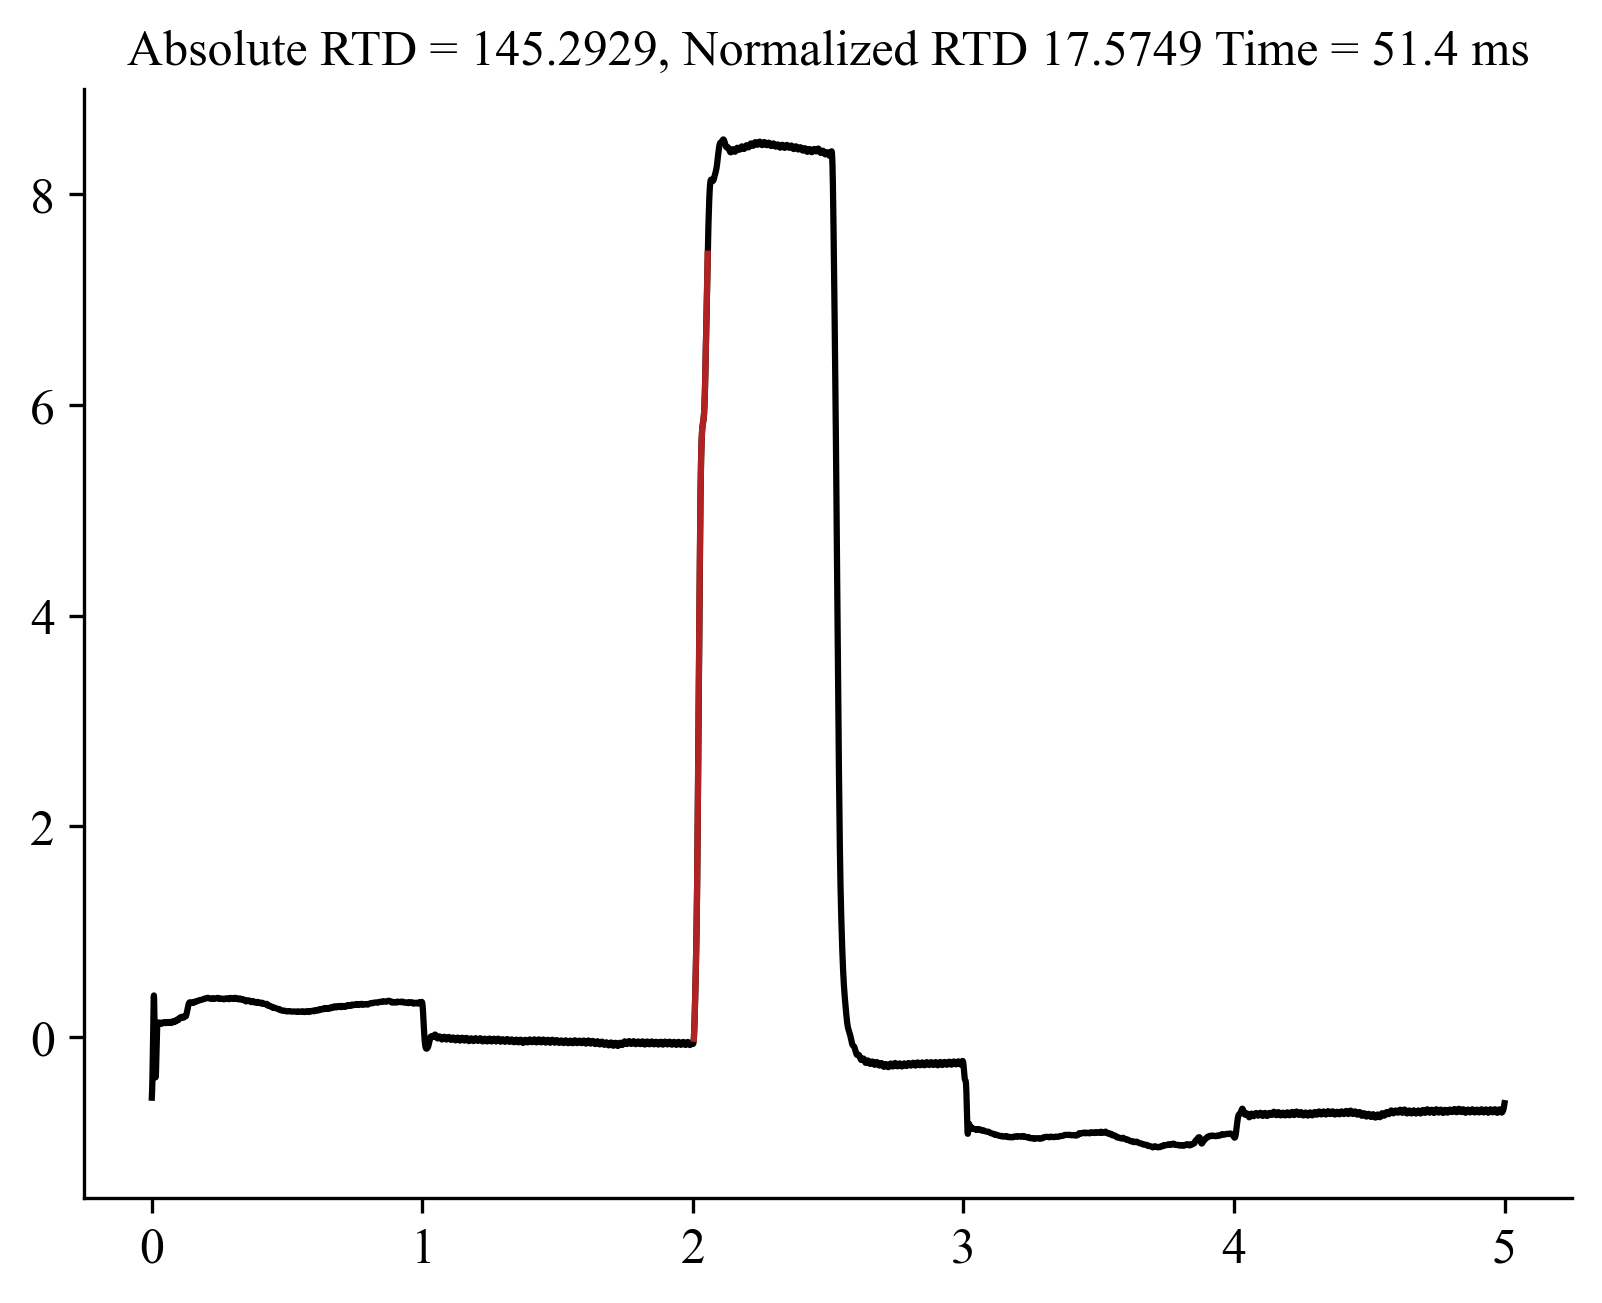

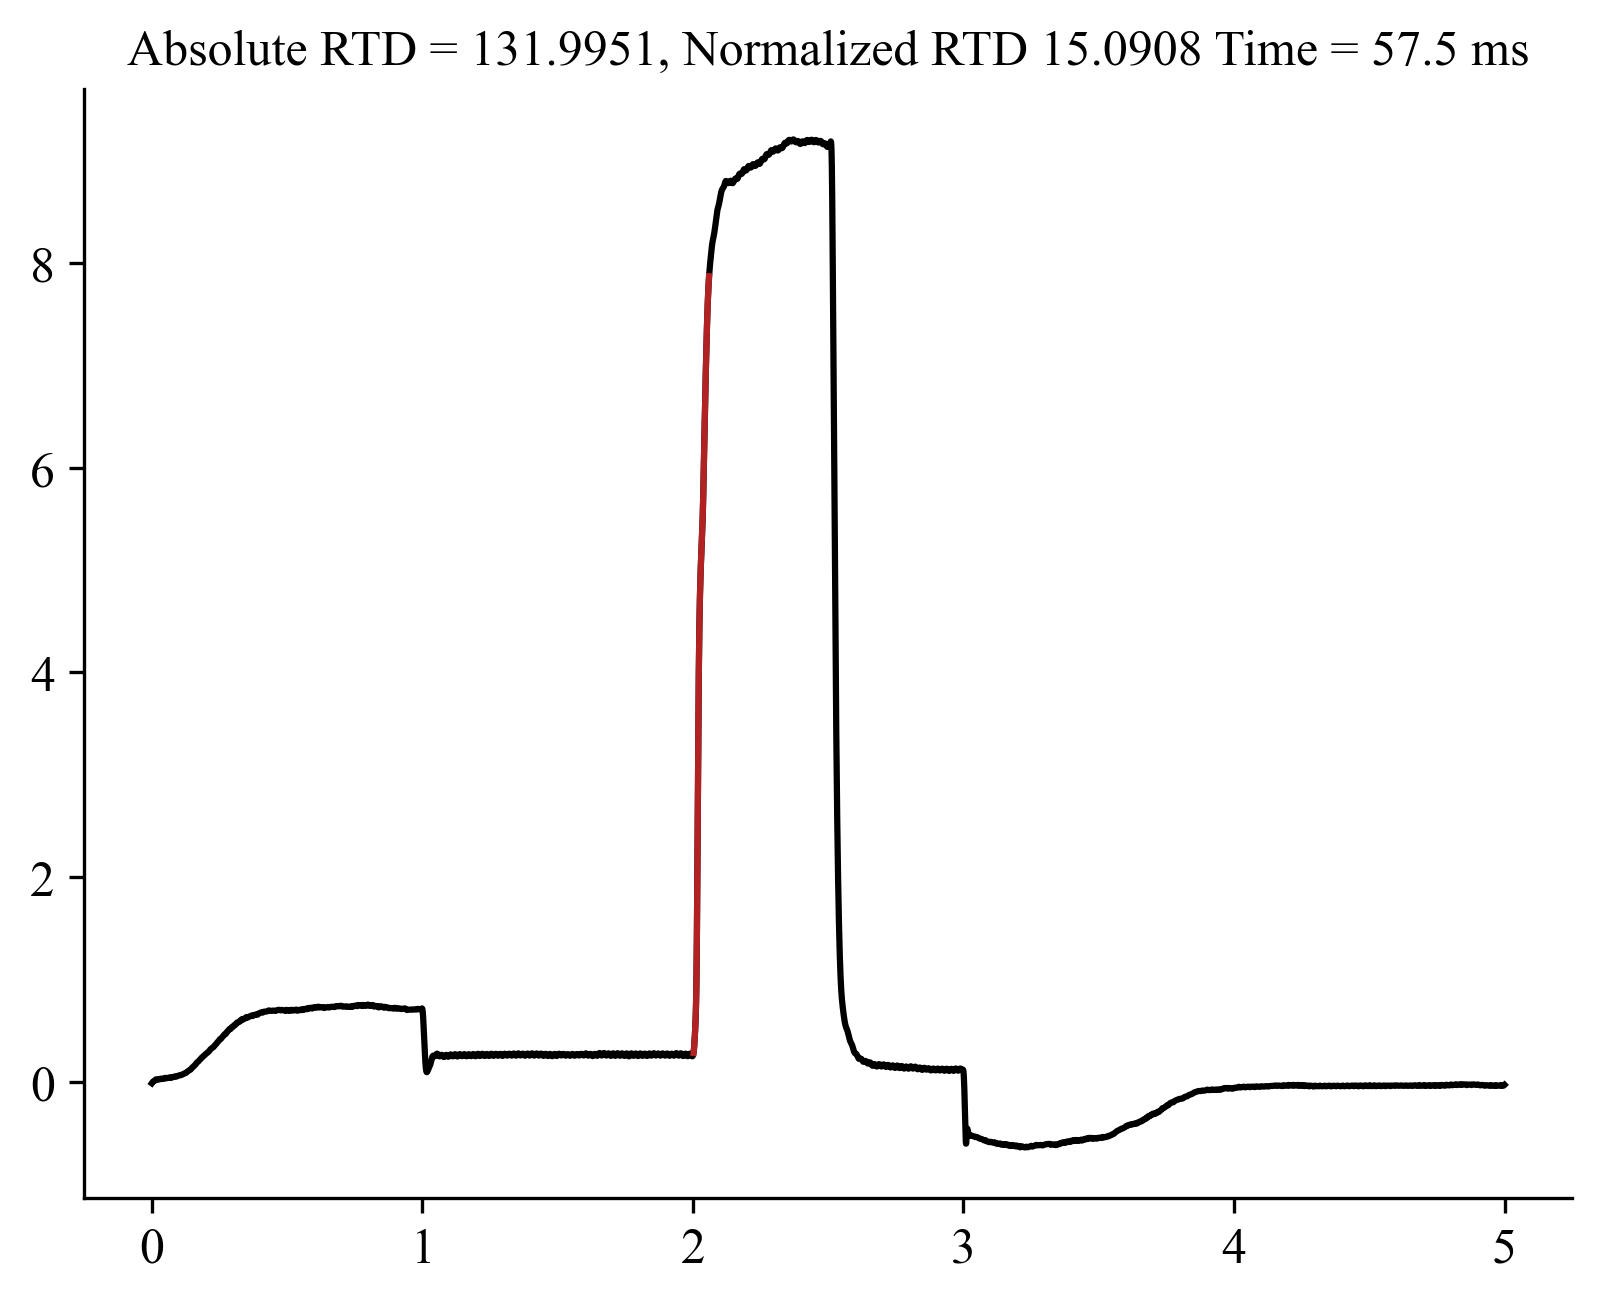

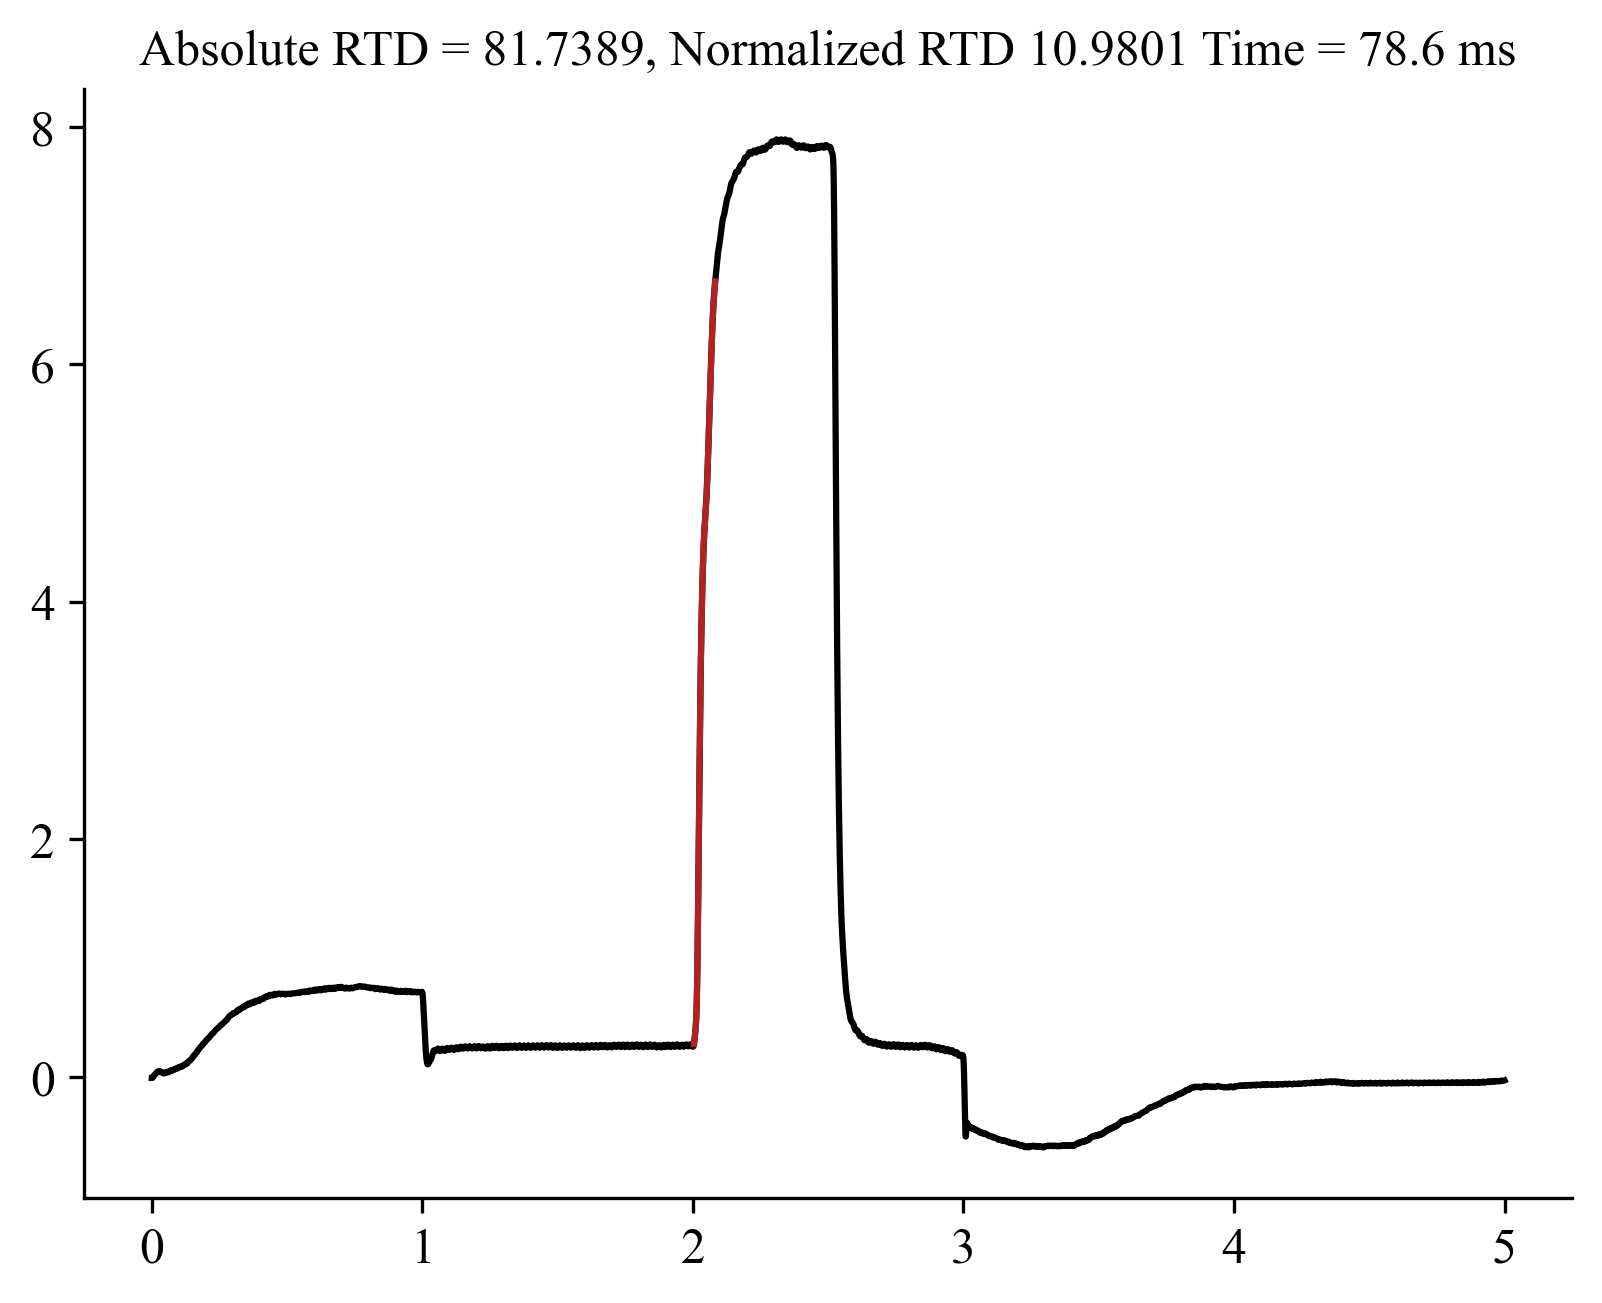

In [4]:
AnalyzedFiles, FinalResults = Analysis.Run(Directory = Directory, Model = Model, Test = Test, Graph = False)

In [11]:
for File in AnalyzedFiles:
    for Variable in File.OrganizedData:
        if Variable == 'RTD':
            print(File.OrganizedData[Variable])

nan
145.29289783458069
nan
nan
nan
nan
nan
nan
nan
nan
nan
131.99509610097974
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
81.73888814853447
nan
nan
nan
nan
nan
nan
nan


In [5]:
# %time FinalResults.to_excel('/Users/benji/Library/CloudStorage/OneDrive-UniversityofGuelph/Imported_Data2.xlsx', index = False)

In [6]:
# %time df = pd.read_excel('/Users/benji/Library/CloudStorage/OneDrive-UniversityofGuelph/Imported_Data2.xlsx')

In [7]:
# PeakForce = {}
# ktrForce = {}
# prektrs = {}
# postktrs = {}
# ktrs = {}
# for pCa in Constants.pCas:
#     PeakForce[pCa] = FinalResults[f'Active Force (pCa {pCa})'].mean()
#     ktrForce[pCa] = FinalResults[f'ktr Force (pCa {pCa})'].mean()
#     prektrs[pCa] = FinalResults.loc[(FinalResults[f'Goodness of fit (r^{2}) (pCa {pCa})'] >= .95) & (FinalResults['Timepoint'] == 'pre'), [f'ktr (/s) (pCa {pCa})']].mean()
#     postktrs[pCa] = FinalResults.loc[(FinalResults[f'Goodness of fit (r^{2}) (pCa {pCa})'] >= .95) & (FinalResults['Timepoint'] == 'post'), [f'ktr (/s) (pCa {pCa})']].mean()
#     ktrs[pCa] = {'Pre': FinalResults.loc[(FinalResults[f'Goodness of fit (r^{2}) (pCa {pCa})'] >= .95) & (FinalResults['Timepoint'] == 'pre'), [f'ktr (/s) (pCa {pCa})']].mean(),
#                  'Post': FinalResults.loc[(FinalResults[f'Goodness of fit (r^{2}) (pCa {pCa})'] >= .95) & (FinalResults['Timepoint'] == 'post'), [f'ktr (/s) (pCa {pCa})']].mean()}

In [8]:
# Means = {}
# STDEV = {}
# for Column in FinalResults.columns:
#     for Timepoint in ['Pre', 'Post']:
#         try:
#             Means[f'{Timepoint.capitalize()}:' + Column] = {Column: FinalResults.loc[FinalResults['Timepoint'] == Timepoint.capitalize(), Column].mean()}
#             STDEV[f'{Timepoint.capitalize()}:' + Column] = np.std(FinalResults.loc[FinalResults['Timepoint'] == Timepoint.capitalize(), Column])
            
#             # np.std(Results[column]) / np.sqrt(len(Results[column]))
#         except:
#             pass

In [9]:
# Averagedktrs: dict = {}
# pCaForces: dict = {}
# ktrForces: dict = {}
# for pCa in Constants.pCas:
#     for Timepoint in ['pre', 'post']:

#         Averagedktrs[pCa + Timepoint] = ktrs.loc[(ktrs['pCa'] == pCa) & (ktrs['Timepoint'] == Timepoint), 'ktr'].mean()
#         Averagedktrs[pCa + Timepoint] = ktrs.loc[(ktrs['pCa'] == pCa) & (ktrs['Timepoint'] == Timepoint), 'ktr'].mean()
#         Averagedktrs[pCa + Timepoint] = ktrs.loc[(ktrs['pCa'] == pCa) & (ktrs['Timepoint'] == Timepoint), 'ktr'].mean()

# Averagedktrs
